Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.1     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tibble       3.3.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         1.3.0
✔ modeldata    1.5.1     ✔ workflows    1.2.0
✔ parsnip      1.3.2     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)
#strata = Outcome makes the split stratified: the class proportions of Outcome are preserved in both training and test sets.
diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [5]:
library(dplyr)
glimpse(diabetes_train)


Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 4, 10, 1, 13, 5, 5, 6, 10, 4, 11, 3, 7, 7,…
$ Glucose                  <dbl> 89, 110, 139, 103, 145, 117, 109, 92, 122, 10…
$ BloodPressure            <dbl> 66, 92, 80, 30, 82, 92, 75, 92, 78, 60, 76, 6…
$ SkinThickness            <dbl> 23, 0, 0, 38, 19, 0, 26, 0, 31, 33, 0, 25, 0,…
$ Insulin                  <dbl> 94, 0, 0, 83, 110, 0, 0, 0, 0, 192, 0, 70, 0,…
$ BMI                      <dbl> 28.1, 37.6, 27.1, 43.3, 22.2, 34.1, 36.0, 19.…
$ DiabetesPedigreeFunction <dbl> 0.167, 0.191, 1.441, 0.183, 0.245, 0.337, 0.5…
$ Age                      <dbl> 21, 30, 57, 33, 57, 38, 60, 28, 45, 33, 35, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

In [6]:
#Outcome because it is non binary

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |             |
| BMI         |             |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

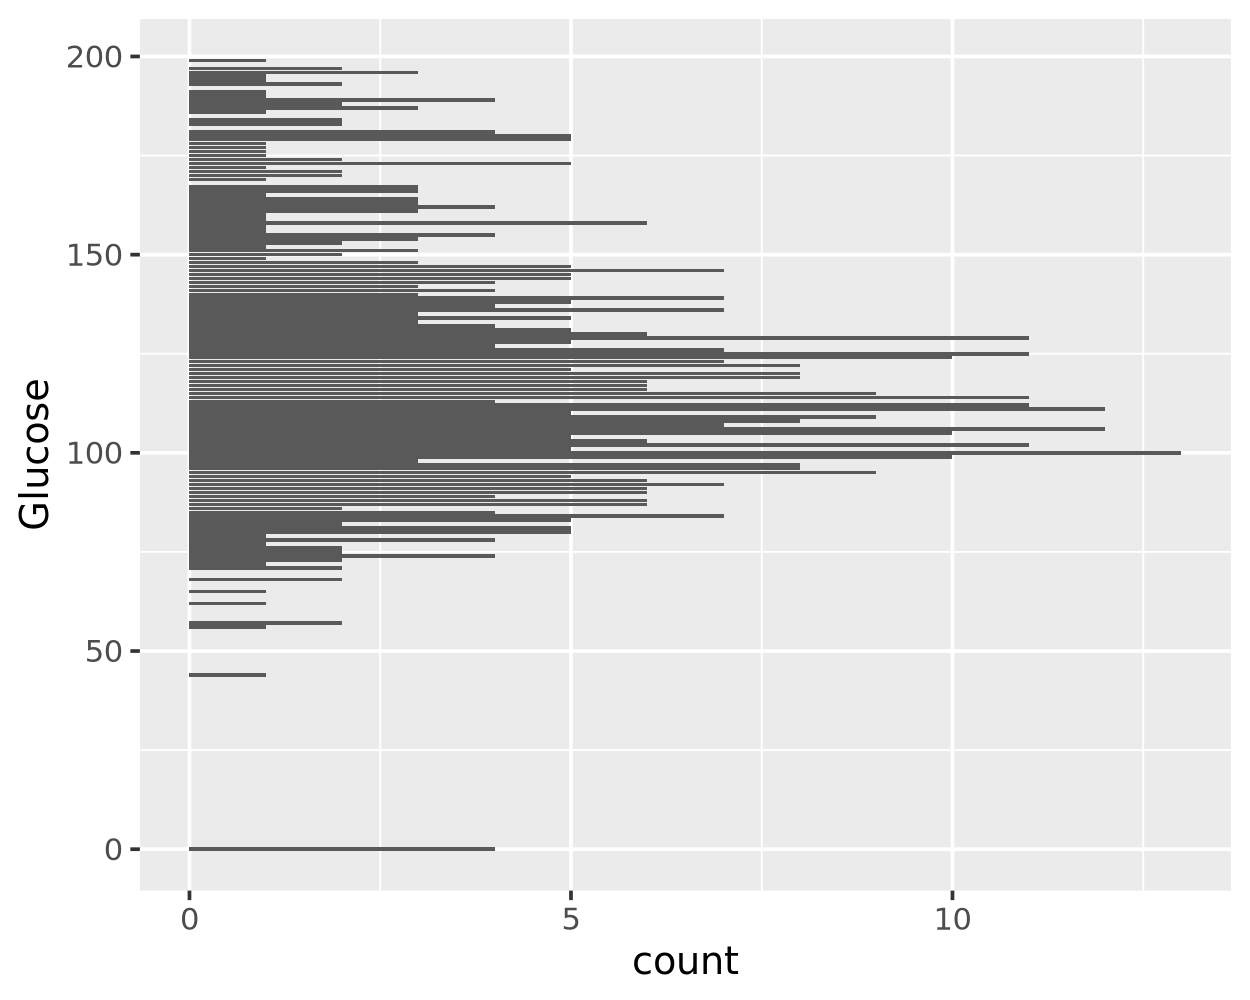

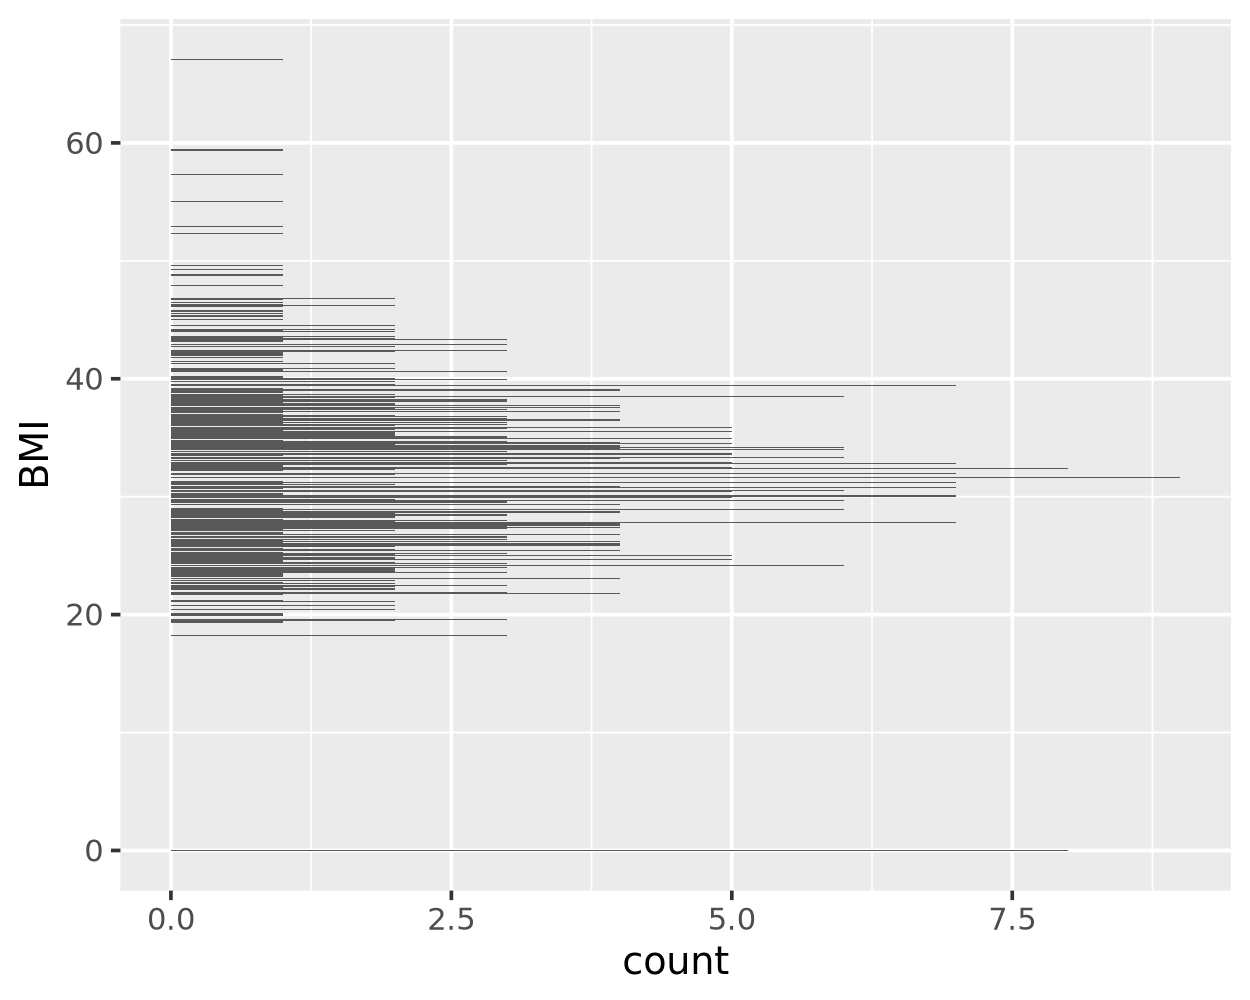

In [8]:
ggplot(diabetes_train, aes(y = Glucose)) +geom_bar()
ggplot(diabetes_train, aes(y = BMI)) +geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

In [9]:

#More counts for glucose but not significantly more


Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [10]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,89.0
0,BMI,28.1
0,Glucose,110.0
0,BMI,37.6
0,Glucose,139.0
0,BMI,27.1


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

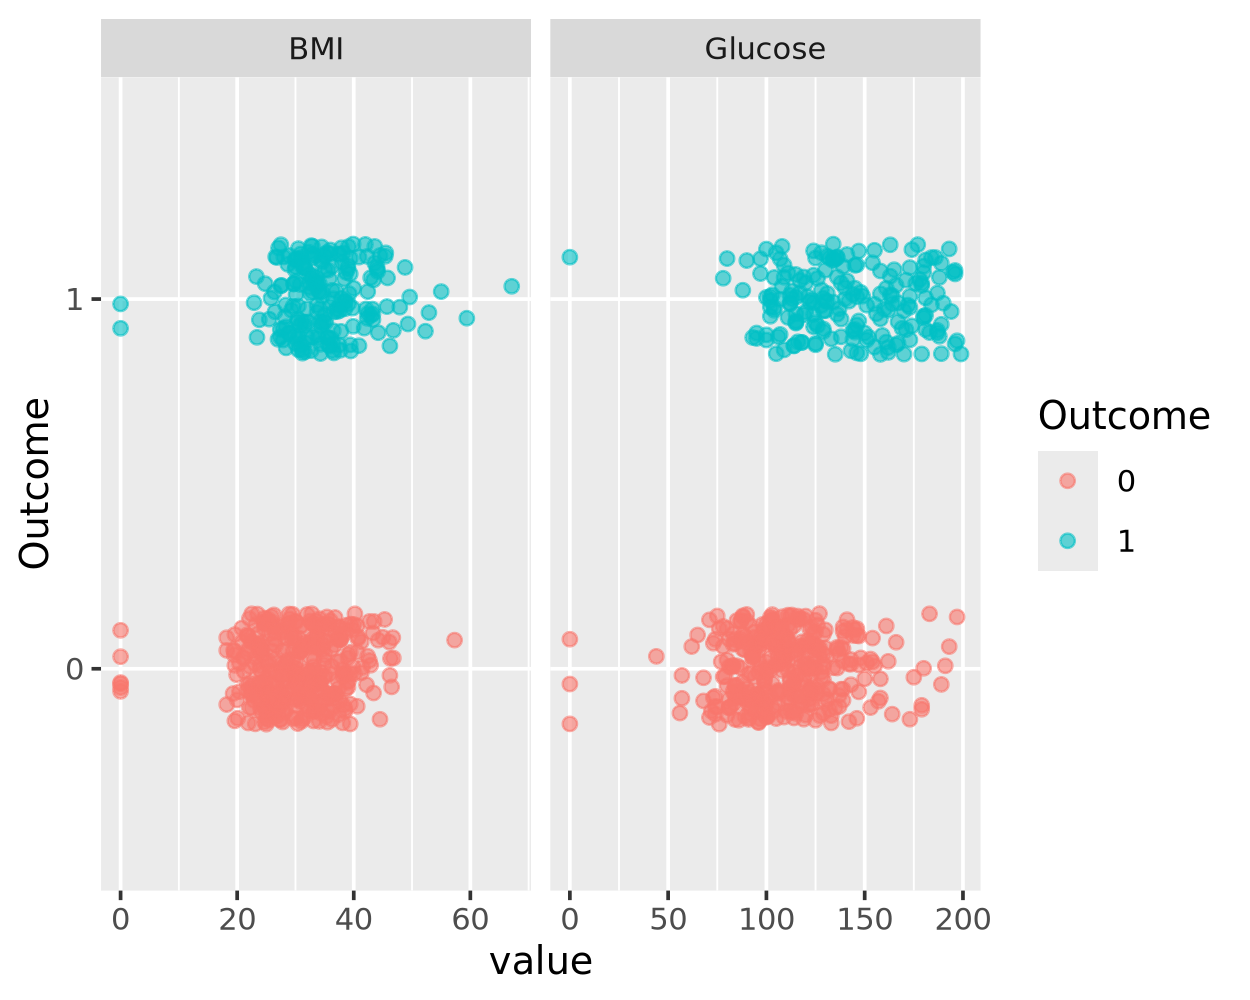

In [12]:


ggplot(plot_df, aes(x = value, y = Outcome, color = Outcome)) +
  geom_jitter(height = 0.15, width = 0, alpha = 0.6, size = 1.6) +
  facet_wrap(~name, ncol = 2, scales = "free_x") 
#creates one panel for Glucose and one for BMI, each with its own x-scale.

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

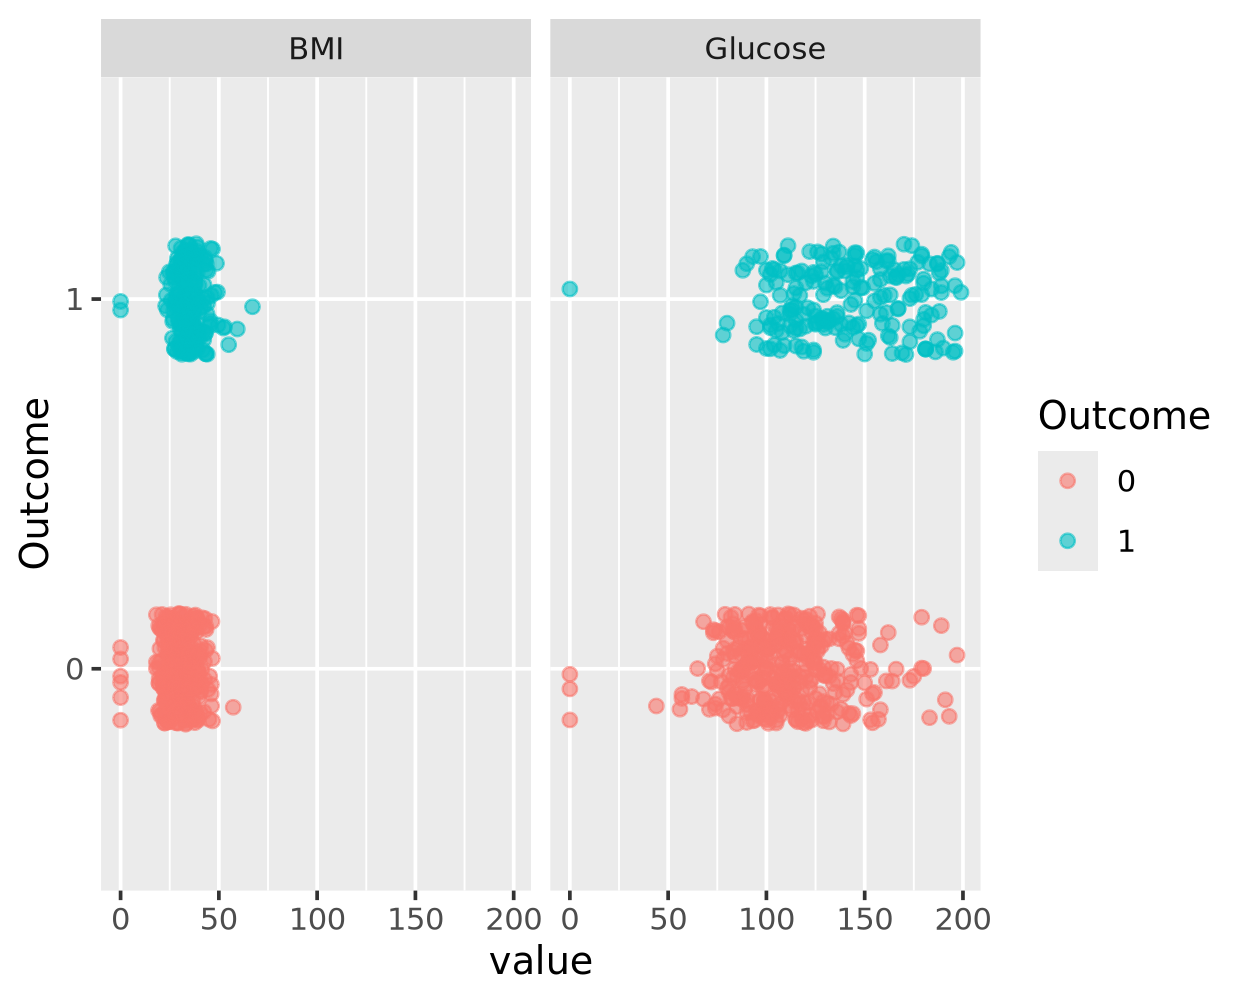

In [14]:
ggplot(plot_df, aes(x = value, y = Outcome, color = Outcome)) +
  geom_jitter(height = 0.15, width = 0, alpha = 0.6, size = 1.6) +
  facet_wrap(~name, ncol = 2) 
#It defaults to fixed scales (the ggplot2 default), meaning all facets share the same x-axis scale.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [15]:

mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, diabetes_train)

mod_fit



parsnip model object


Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.32653      0.06826      0.03589  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 578.7 	AIC: 584.7

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [18]:

diabetes_test_wPred <- augment(mod_fit, diabetes_test)
head(diabetes_test_wPred)


.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.4308602,0.56913984,6,148,72,35,0,33.6,0.627,50,1
0,0.9213166,0.07868345,1,85,66,29,0,26.6,0.351,31,0
1,0.3700340,0.62996595,0,137,40,35,168,43.1,2.288,33,1
0,0.8047318,0.19526822,5,116,74,0,0,25.6,0.201,30,0
0,0.6878065,0.31219352,10,115,0,0,0,35.3,0.134,29,0
1,0.2147658,0.78523422,10,168,74,0,0,38.0,0.537,34,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [19]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 111  28
         1  14  39

In [20]:
#How many individuals had diabetes in your test data? 28 + 39 = 67

#Of those that actually had diabetes, how many were predicted to have diabetes by your model? 39 (true positives)

#How many individuals predicted to have diabetes did not have diabetes? 14 (false positives)

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**